<a href="https://colab.research.google.com/github/LEbEdEV79/Fingers/blob/main/Fingers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt           # Импорт модуля pyplot
import numpy as np

In [ ]:

    # 00 - А 10 - Л 20 - Х
    # 01 - Б 11 - M 21 - ц
    # 02 - В 12 - Н 22 - ч
    # 03 - Г 13 - О 23 - Ш
    # 04 - Д 14 - П 24 - Ъ
    # 05 - Е 15 - Р 25 - Ы
    # 06 - Ж 16 - С 26 - Ь
    # 07 - З 17 - Т 27 - Э
    # 08 - И 18 - У 28 - Ю
    # 9 - К 19 - Ф 29 - Я
    #31 - spoke
    #32 - FU



#ЗАГРУЗКА ДАННЫХ

In [2]:
# Заголовки для DataFrame с названиями точек одной руки Mediapipe
titles = [
    'wrist_x', 'wrist_y', 'wrist_z',          # Запястье
    'thumb_cmc_x', 'thumb_cmc_y', 'thumb_cmc_z',  # Основание большого пальца
    'thumb_mcp_x', 'thumb_mcp_y', 'thumb_mcp_z',  # Сустав большого пальца
    'thumb_ip_x', 'thumb_ip_y', 'thumb_ip_z',      # Кончик большого пальца
    'thumb_tip_x', 'thumb_tip_y', 'thumb_tip_z',   # Кончик большого пальца

    'index_finger_mcp_x', 'index_finger_mcp_y', 'index_finger_mcp_z',  # Сустав указательного пальца
    'index_finger_pip_x', 'index_finger_pip_y', 'index_finger_pip_z',  # Средний сустав указательного пальца
    'index_finger_dip_x', 'index_finger_dip_y', 'index_finger_dip_z',  # Конечный сустав указательного пальца
    'index_finger_tip_x', 'index_finger_tip_y', 'index_finger_tip_z',  # Кончик указательного пальца

    'middle_finger_mcp_x', 'middle_finger_mcp_y', 'middle_finger_mcp_z',  # Сустав среднего пальца
    'middle_finger_pip_x', 'middle_finger_pip_y', 'middle_finger_pip_z',  # Средний сустав среднего пальца
    'middle_finger_dip_x', 'middle_finger_dip_y', 'middle_finger_dip_z',  # Конечный сустав среднего пальца
    'middle_finger_tip_x', 'middle_finger_tip_y', 'middle_finger_tip_z',  # Кончик среднего пальца

    'ring_finger_mcp_x', 'ring_finger_mcp_y', 'ring_finger_mcp_z',  # Сустав безымянного пальца
    'ring_finger_pip_x', 'ring_finger_pip_y', 'ring_finger_pip_z',  # Средний сустав безымянного пальца
    'ring_finger_dip_x', 'ring_finger_dip_y', 'ring_finger_dip_z',  # Конечный сустав безымянного пальца
    'ring_finger_tip_x', 'ring_finger_tip_y', 'ring_finger_tip_z',  # Кончик безымянного пальца

    'pinky_mcp_x', 'pinky_mcp_y', 'pinky_mcp_z',  # Сустав мизинца
    'pinky_pip_x', 'pinky_pip_y', 'pinky_pip_z',  # Средний сустав мизинца
    'pinky_dip_x', 'pinky_dip_y', 'pinky_dip_z',  # Конечный сустав мизинца
    'pinky_tip_x', 'pinky_tip_y', 'pinky_tip_z',   # Кончик мизинца

    'class' # класс
]


# Загрузка готоввого датасета, видео и шрифта

In [ ]:
# Загружаем данные
#csv
import gdown
url = 'https://drive.google.com/uc?export=download&id=1orXKCvqhMiTmVrm4FF8qsEt18LnlWAR2'
output = 'fingers.zip'
gdown.download(url, output, quiet=True)
!unzip -o fingers.zip; rm fingers.zip

# video
url = 'https://drive.google.com/uc?export=download&id=1TDqPaVVYuQzF8cmSeVtCD4eNKG6hPrib'
output = 'hw.zip'
gdown.download(url, output, quiet=True)
!unzip -o hw.zip; rm hw.zip
# font
url = 'https://drive.google.com/uc?export=download&id=1ec7zGjUXFzXYzO0aDjWKWjbKqQRm_6I2'
output = 'font.zip'
gdown.download(url, output, quiet=True)
!unzip -o font.zip; rm font.zip


Archive:  fingers.zip
  inflating: fingers-2float-2.csv    
  inflating: __MACOSX/._fingers-2float-2.csv  
Archive:  hw.zip
  inflating: helloWorld.mp4          
  inflating: __MACOSX/._helloWorld.mp4  
Archive:  font.zip
  inflating: AlumniSansPinstripe-Regular.ttf  
  inflating: __MACOSX/._AlumniSansPinstripe-Regular.ttf  


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
# функция загрузки файлов букв из директории
# принимает: путь к файлам
# возвращает: очищеный dataFrame


import os
import re

def loadDataset(dir ="/content/drive/MyDrive/Data/fingers/fingers-csv/"):

  #listFiles=os.listdir(path=dir)
  listFiles = [f for f in os.listdir(dir)]
  listFiles.sort()


  dataset = pd.DataFrame()
  print(listFiles)
  print(len(listFiles))
  result = pd.DataFrame() # columns=titles

  for i in listFiles:
    dataFile = pd.read_csv(dir+i, sep=",", float_precision='round_trip', encoding='latin1', on_bad_lines='skip',  header=[0]) # header=None
    # on bad lines для исключения обшибки токенизации
    dataFile.dropna(inplace=True)
    print("File:", i, "size:",dataFile.shape)
    dataFile['BL'] = pd.to_numeric(dataFile['BL'], errors='coerce').astype('Int64')
    # print(dataFile.head(1))
    result = pd.concat([result,dataFile])

  print("result:",result.shape)
  return result


In [24]:
data1 = loadDataset("/content/drive/MyDrive/fingers/1/")


['0f.csv', '10f.csv', '11f.csv', '12f.csv', '13f.csv', '14f-ffix.csv', '14f.csv', '15f.csv', '16f.csv', '17f-ffix.csv', '17f.csv', '18f.csv', '19f.csv', '1f.csv', '20f.csv', '21-2024-11-18-13-20.csv', '22f.csv', '23f.csv', '24f.csv', '25f.csv', '26f.csv', '27f.csv', '28f.csv', '29f.csv', '2f-ffix.csv', '2f.csv', '30f.csv', '31f.csv', '3f.csv', '4f.csv', '5f.csv', '6f.csv', '7f.csv', '8f.csv', '9f.csv']
35
File: 0f.csv size: (787, 64)
File: 10f.csv size: (795, 64)
File: 11f.csv size: (1593, 64)
File: 12f.csv size: (792, 64)
File: 13f.csv size: (788, 64)
File: 14f-ffix.csv size: (28, 64)
File: 14f.csv size: (1593, 64)
File: 15f.csv size: (1578, 64)
File: 16f.csv size: (794, 64)
File: 17f-ffix.csv size: (36, 64)
File: 17f.csv size: (1593, 64)
File: 18f.csv size: (791, 64)
File: 19f.csv size: (792, 64)
File: 1f.csv size: (792, 64)
File: 20f.csv size: (796, 64)
File: 21-2024-11-18-13-20.csv size: (1001, 64)
File: 22f.csv size: (789, 64)
File: 23f.csv size: (785, 64)
File: 24f.csv size: (798

Проверка загруженного

In [25]:
# data1.drop(columns='Unnamed: 0', inplace=True)
data1.head(15)


A         B                          C         D  \
0   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
1   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
2   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
3   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
4   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
5   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
6   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
7   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
8   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
9   0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
12   0.4051573574542999  0.806458  -0.0000007009922455836204  0.503722   
13   0.4051573574542999  0.806458  -0.0000007009922455836204  0.503722   
14   0.4051573574542999  0.806458  -0.0000007009922455836204  0.503722   
15   0.4051573574542999  0.806458  -0.0000007009922455836204  0.503722   
16   0.4051573574542999  0.806458  -0.0000007009922455836204  0.503722   

           E         F         G         H         I         J  ...        BC  \
0   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
1   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
2   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
3   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
4   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
5   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
6   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
7   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
8   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
9   0.719625 -0.024326  0.574398  0.545133 -0.031500  0.610366  ...  0.331859   
12  0.668187 -0.014904  0.554907  0.477170 -0.019738  0.580784  ...  0.347205   
13  0.668187 -0.014904  0.554907  0.477170 -0.019738  0.580784  ...  0.347205   
14  0.668187 -0.014904  0.554907  0.477170 -0.019738  0.580784  ...  0.347205   
15  0.668187 -0.014904  0.554907  0.477170 -0.019738  0.580784  ...  0.347205   
16  0.668187 -0.014904  0.554907  0.477170 -0.019738  0.580784  ...  0.347205   

          BD        BE        BF        BG        BH        BI        BJ  \
0   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
1   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
2   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
3   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
4   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
5   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
6   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
7   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
8   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
9   0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.445830   
12  0.272234 -0.088025  0.377130  0.389430 -0.061870  0.352056  0.446814   
13  0.272234 -0.088025  0.377130  0.389430 -0.061870  0.352056  0.446814   
14  0.272234 -0.088025  0.377130  0.389430 -0.061870  0.352056  0.446814   
15  0.272234 -0.088025  0.377130  0.389430 -0.061870  0.352056  0.446814   
16  0.272234 -0.088025  0.377130  0.389430 -0.061870  0.352056  0.446814   

          BK  BL  
0  -0.015611   0  
1  -0.015611   0  
2  -0.015611   0  
3  -0.015611   0  
4  -0.015611   0  
5  -0.015611   0  
6  -0.015611   0  
7  -0.015611   0  
8  -0.015611   0  
9  -0.015611   0  
12 -0.034804   0  
13 -0.034804   0  
14 -0.034804   0  
15 -0.034804   0  
16 -0.034804   0  

[15 rows x 64 colu

In [7]:

data1.shape

(32735, 64)

In [26]:
# Проверка количества образцов и видов класса
data = data1["BL"]

from collections import Counter
print("Data: ",Counter(data))
print("Data: ",len(Counter(data)))

#21

Data:  Counter({2: 3953, 17: 1629, 14: 1621, 11: 1593, 15: 1578, 30: 1575, 21: 1001, 24: 798, 20: 796, 31: 796, 4: 796, 10: 795, 26: 795, 27: 795, 3: 795, 16: 794, 5: 794, 7: 793, 12: 792, 19: 792, 1: 792, 18: 791, 6: 790, 9: 790, 22: 789, 13: 788, 0: 787, 29: 787, 25: 786, 23: 785, 8: 785, 28: 784})
Data:  32


In [27]:
# data1['BL'] = pd.to_numeric(data1['BL'], errors='coerce').astype('Int64')
data1.head()

A         B                          C         D  \
0  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
1  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
2  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
3  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
4  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   

          E         F         G         H       I         J  ...        BC  \
0  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
1  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
2  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
3  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
4  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   

         BD        BE        BF        BG        BH        BI       BJ  \
0  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
1  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
2  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
3  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
4  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   

         BK  BL  
0 -0.015611   0  
1 -0.015611   0  
2 -0.015611   0  
3 -0.015611   0  
4 -0.015611   0  

[5 rows x 64 columns]

In [28]:
len(data1)

32735

In [29]:
data2 = loadDataset("/content/drive/MyDrive/fingers/2/")

['0-2.csv', '1-2.csv', '10-2.csv', '11-2.csv', '12-2.csv', '13-2.csv', '14-2.csv', '15-2.csv', '16-2.csv', '17-2.csv', '18-2.csv', '19-2.csv', '2-2.csv', '20-2.csv', '20-3.csv', '3-2.csv', '4-2.csv', '5-2.csv', '7-2.csv', '8-2.csv', '9-2.csv']
21
File: 0-2.csv size: (437, 64)
File: 1-2.csv size: (331, 64)
File: 10-2.csv size: (220, 64)
File: 11-2.csv size: (314, 64)
File: 12-2.csv size: (228, 64)
File: 13-2.csv size: (304, 64)
File: 14-2.csv size: (287, 64)
File: 15-2.csv size: (354, 64)
File: 16-2.csv size: (605, 64)
File: 17-2.csv size: (376, 64)
File: 18-2.csv size: (455, 64)
File: 19-2.csv size: (702, 64)
File: 2-2.csv size: (504, 64)
File: 20-2.csv size: (414, 64)
File: 20-3.csv size: (264, 64)
File: 3-2.csv size: (195, 64)
File: 4-2.csv size: (464, 64)
File: 5-2.csv size: (488, 64)
File: 7-2.csv size: (314, 64)
File: 8-2.csv size: (335, 64)
File: 9-2.csv size: (236, 64)
result: (7827, 64)


In [30]:
#data2
#data2.drop([0], inplace=True)

# data2.columns = data2.iloc[0]
# data2 = data2.drop(0).reset_index(drop=True)

# data2['BL'] = pd.to_numeric(data2['BL'], errors='coerce').astype('Int64')

data2.head()

A         B             C         D         E         F  \
0   0.3784237205982208  0.879752  5.434166e-07  0.434288  0.817773 -0.028485   
1   0.3865138292312622  0.799180  5.288317e-07  0.429738  0.733567 -0.029869   
2  0.38257455825805664  0.732616  4.705842e-07  0.426935  0.676213 -0.030548   
3   0.3879550099372864  0.686051  4.180997e-07  0.430397  0.632184 -0.026296   
4  0.38713324069976807  0.579667 -7.957543e-08  0.422396  0.515915 -0.003647   

          G         H         I         J  ...        BC        BD        BE  \
0  0.480780  0.726636 -0.042537  0.505941  ...  0.268170  0.548864 -0.061474   
1  0.466018  0.641976 -0.047513  0.494445  ...  0.277559  0.490732 -0.074283   
2  0.466752  0.589838 -0.048071  0.496149  ...  0.287000  0.435755 -0.071409   
3  0.466786  0.554475 -0.041276  0.494218  ...  0.297614  0.410361 -0.056270   
4  0.441550  0.443471 -0.004457  0.453458  ...  0.350445  0.329908 -0.018981   

         BF        BG        BH        BI        BJ        BK  BL  
0  0.246854  0.493293 -0.069465  0.228651  0.437808 -0.073244   0  
1  0.255309  0.433445 -0.085736  0.235963  0.377419 -0.092947   0  
2  0.266892  0.383057 -0.081539  0.249366  0.331358 -0.087518   0  
3  0.280482  0.361139 -0.063251  0.266973  0.312278 -0.066819   0  
4  0.359997  0.357845 -0.017504  0.361968  0.390598 -0.012754   0  

[5 rows x 64 columns]

In [ ]:
# фиксим косяк с загрузкой класса "0", который грузитя как "0 "
#data2.loc[data2["BL"] == "0 "] = "0"

In [31]:

data = data2["BL"]

print("Data: ",Counter(data))
print("Data: ",len(Counter(data)))

### "0 " пофиксить

Data:  Counter({19: 702, 20: 678, 16: 605, 2: 504, 5: 488, 4: 464, 18: 455, 0: 437, 17: 376, 15: 354, 8: 335, 1: 331, 11: 314, 7: 314, 13: 304, 14: 287, 9: 236, 12: 228, 10: 220, 3: 195})
Data:  20


In [32]:
# если появляется класс BL
data2 = data2[data2["BL"] != 'BL']



In [33]:
data = data2["BL"]

print("Data: ",Counter(data))
print("Data: ",len(Counter(data)))

Data:  Counter({19: 702, 20: 678, 16: 605, 2: 504, 5: 488, 4: 464, 18: 455, 0: 437, 17: 376, 15: 354, 8: 335, 1: 331, 11: 314, 7: 314, 13: 304, 14: 287, 9: 236, 12: 228, 10: 220, 3: 195})
Data:  20


In [34]:
data2.shape

(7827, 64)

In [35]:

data3 = loadDataset("/content/drive/MyDrive/fingers/3/")

['0-2024-10-15-9-20.csv', '1-2024-10-15-23-59.csv', '10-2024-10-11-35-57.csv', '11-2024-11-13-44-59.csv', '12-2024-11-13-50-47.csv', '13-2024-11-14-36-41.csv', '14-2024-11-14-40-50.csv', '15-2024-11-14-44-1.csv', '16-2024-11-17-59-32.csv', '17-2024-11-11-56-43.csv', '18-2024-11-12-0-42.csv', '19-2024-11-12-5-20.csv', '2-2024-10-15-29-34.csv', '20-2024-11-12-11-19.csv', '21-2024-11-12-16-43.csv', '22-2024-11-13-47-7.csv', '23-2024-11-13-51-20.csv', '24-2024-11-15-17-41.csv', '25-2024-11-15-21-24.csv', '26-2024-11-17-59-42.csv', '27-2024-11-20-22-53.csv', '28-2024-11-20-29-32.csv', '29-2024-11-20-37-34.csv', '3-2024-10-15-32-53.csv', '30-2024-11-20-41-15.csv', '31-2024-11-12-13-52.csv', '4-2024-10-16-22-1.csv', '5-2024-10-16-26-27.csv', '6-2024-10-16-32-7.csv', '7-2024-10-16-58-20.csv', '8-2024-10-17-1-0.csv', '9-2024-10-11-32-55.csv']
32
File: 0-2024-10-15-9-20.csv size: (1001, 64)
File: 1-2024-10-15-23-59.csv size: (1001, 64)
File: 10-2024-10-11-35-57.csv size: (1001, 64)
File: 11-2024

In [36]:
# data3['BL'] = pd.to_numeric(data3['BL'], errors='coerce').astype('Int64')
data3.head()

A         B             C         D         E         F         G  \
0  0.256147  0.877893 -1.309080e-07  0.322438  0.781025 -0.013115  0.368296   
1  0.222200  0.727611 -1.529417e-07  0.282232  0.616544 -0.004512  0.326686   
2  0.247943  0.707330 -3.756586e-07  0.305039  0.620009 -0.020099  0.351710   
3  0.239151  0.690924 -4.131317e-07  0.298990  0.607512 -0.022298  0.350414   
4  0.234680  0.668505 -4.120496e-07  0.294817  0.571973 -0.018238  0.342122   

          H         I         J  ...        BC        BD        BE        BF  \
0  0.665830 -0.022675  0.384392  ...  0.152320  0.476897 -0.042524  0.189089   
1  0.502953 -0.006971  0.351270  ...  0.148070  0.305498 -0.025538  0.174224   
2  0.483142 -0.025047  0.364795  ...  0.156392  0.325964 -0.028665  0.174477   
3  0.467581 -0.028978  0.365806  ...  0.155885  0.299322 -0.035564  0.175024   
4  0.438281 -0.024273  0.354266  ...  0.147555  0.275892 -0.028832  0.166468   

         BG        BH        BI        BJ        BK  BL  
0  0.468843 -0.046817  0.222769  0.498611 -0.045425   0  
1  0.335584 -0.021171  0.190095  0.388749 -0.013671   0  
2  0.383781 -0.020658  0.184515  0.430946 -0.007532   0  
3  0.350371 -0.028158  0.188565  0.403212 -0.015690   0  
4  0.321135 -0.022156  0.178957  0.367319 -0.009972   0  

[5 rows x 64 columns]

In [37]:
data = data3["BL"]
# третья папка загружае индекса с .0 это фикс...
#data3["BL"] = data3["BL"].astype(str).str.replace('.0', '', regex=False)
from collections import Counter
print("Data: ",Counter(data))
print("Data: ",len(Counter(data)))

Data:  Counter({0: 1001, 1: 1001, 10: 1001, 11: 1001, 12: 1001, 13: 1001, 14: 1001, 15: 1001, 16: 1001, 17: 1001, 18: 1001, 19: 1001, 2: 1001, 20: 1001, 21: 1001, 22: 1001, 23: 1001, 24: 1001, 25: 1001, 26: 1001, 27: 1001, 28: 1001, 29: 1001, 3: 1001, 30: 1001, 31: 1001, 4: 1001, 5: 1001, 6: 1001, 7: 1001, 8: 1001, 9: 1001})
Data:  32


In [58]:

   # result = pd.DataFrame(columns=titles) # columns=titles

# data1.append(data2copy)
# data1.append(data3)

# data1 = data1.reset_index()
# data2 = data2.reset_index()
# data3 = data3.reset_index()

#data = pd.concat([data1, data2copy, data3], axis=1)
if 'level_0' in data2.columns:
    data2 = data2.drop(columns=['level_0'])
if 'level_0' in data1.columns:
    data1 = data1.drop(columns=['level_0'])

#data1.append(data2, ignore_index=True)
data = pd.concat([data1, data2, data3], axis=0, ignore_index=True)

#data.columns = titles

In [52]:
if 'level_0' in data.columns:
    data1 = data.drop(columns=['level_0'])

In [59]:
# data['BL'] = pd.to_numeric(data['BL'], errors='coerce').astype('Int64')
data = data.reset_index(drop=True)  # drop=True уберет старые индексы

In [60]:
data.head()

A         B                          C         D  \
0  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
1  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
2  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
3  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
4  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   

          E         F         G         H       I         J  ...        BC  \
0  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
1  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
2  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
3  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
4  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   

         BD        BE        BF        BG        BH        BI       BJ  \
0  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
1  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
2  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
3  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
4  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   

         BK  BL  
0 -0.015611   0  
1 -0.015611   0  
2 -0.015611   0  
3 -0.015611   0  
4 -0.015611   0  

[5 rows x 64 columns]

In [50]:
data.shape

(72594, 64)

In [53]:
dataTest=data

In [54]:
dataT = pd.DataFrame(dataTest, columns=titles)

In [55]:
dataTest

wrist_x  wrist_y  wrist_z  thumb_cmc_x  thumb_cmc_y  thumb_cmc_z  \
0          NaN      NaN      NaN          NaN          NaN          NaN   
1          NaN      NaN      NaN          NaN          NaN          NaN   
2          NaN      NaN      NaN          NaN          NaN          NaN   
3          NaN      NaN      NaN          NaN          NaN          NaN   
4          NaN      NaN      NaN          NaN          NaN          NaN   
...        ...      ...      ...          ...          ...          ...   
72589      NaN      NaN      NaN          NaN          NaN          NaN   
72590      NaN      NaN      NaN          NaN          NaN          NaN   
72591      NaN      NaN      NaN          NaN          NaN          NaN   
72592      NaN      NaN      NaN          NaN          NaN          NaN   
72593      NaN      NaN      NaN          NaN          NaN          NaN   

       thumb_mcp_x  thumb_mcp_y  thumb_mcp_z  thumb_ip_x  ...  pinky_pip_x  \
0              NaN          NaN          NaN         NaN  ...          NaN   
1              NaN          NaN          NaN         NaN  ...          NaN   
2              NaN          NaN          NaN         NaN  ...          NaN   
3              NaN          NaN          NaN         NaN  ...          NaN   
4              NaN          NaN          NaN         NaN  ...          NaN   
...            ...          ...          ...         ...  ...          ...   
72589          NaN          NaN          NaN         NaN  ...          NaN   
72590          NaN          NaN          NaN         NaN  ...          NaN   
72591          NaN          NaN          NaN         NaN  ...          NaN   
72592          NaN          NaN          NaN         NaN  ...          NaN   
72593          NaN          NaN          NaN         NaN  ...          NaN   

       pinky_pip_y  pinky_pip_z  pinky_dip_x  pinky_dip_y  pinky_dip_z  \
0              NaN          NaN          NaN          NaN          NaN   
1              NaN          NaN          NaN          NaN          NaN   
2              NaN          NaN          NaN          NaN          NaN   
3              NaN          NaN          NaN          NaN          NaN   
4              NaN          NaN          NaN          NaN          NaN   
...            ...          ...          ...          ...          ...   
72589          NaN          NaN          NaN          NaN          NaN   
72590          NaN          NaN          NaN          NaN          NaN   
72591          NaN          NaN          NaN          NaN          NaN   
72592          NaN          NaN          NaN          NaN          NaN   
72593          NaN          NaN          NaN          NaN          NaN   

       pinky_tip_x  pinky_tip_y  pinky_tip_z  class  
0              NaN          NaN          NaN    NaN  
1              NaN          NaN          NaN    NaN  
2              NaN          NaN          NaN    NaN  
3              NaN          NaN          NaN    NaN  
4              NaN          NaN          NaN    NaN  
...            ...          ...          ...    ...  
72589          NaN          NaN          NaN    NaN  
72590          NaN          NaN          NaN    NaN  
72591          NaN          NaN          NaN    NaN  
72592          NaN          NaN          NaN    NaN  
72593          NaN          NaN          NaN    NaN  

[72594 rows x 64 columns]

In [61]:
dataClass = data["BL"]

from collections import Counter
print("Data: ",Counter(dataClass))
print("Data: ",len(Counter(dataClass)))

Data:  Counter({2: 5458, 17: 3006, 15: 2933, 14: 2909, 11: 2908, 30: 2576, 19: 2495, 20: 2475, 16: 2400, 5: 2283, 4: 2261, 18: 2247, 0: 2225, 1: 2124, 8: 2121, 7: 2108, 13: 2093, 9: 2027, 12: 2021, 10: 2016, 21: 2002, 3: 1991, 24: 1799, 31: 1797, 26: 1796, 27: 1796, 6: 1791, 22: 1790, 29: 1788, 25: 1787, 23: 1786, 28: 1785})
Data:  32


In [ ]:
data.drop([0], inplace=True)
data.head()

wrist_x             wrist_y                    wrist_z  \
1  0.24145206809043884  0.8577319383621216  0.00000008572935428219353   
2  0.24145206809043884  0.8577319383621216  0.00000008572935428219353   
3  0.24145206809043884  0.8577319383621216  0.00000008572935428219353   
4  0.24145206809043884  0.8577319383621216  0.00000008572935428219353   
5  0.24145206809043884  0.8577319383621216  0.00000008572935428219353   

           thumb_cmc_x         thumb_cmc_y            thumb_cmc_z  \
1  0.30801570415496826  0.8182258605957031  -0.024717282503843307   
2  0.30801570415496826  0.8182258605957031  -0.024717282503843307   
3  0.30801570415496826  0.8182258605957031  -0.024717282503843307   
4  0.30801570415496826  0.8182258605957031  -0.024717282503843307   
5  0.30801570415496826  0.8182258605957031  -0.024717282503843307   

          thumb_mcp_x         thumb_mcp_y           thumb_mcp_z  \
1  0.3609524369239807  0.7624257802963257  -0.04987639933824539   
2  0.3609524369239807  0.7624257802963257  -0.04987639933824539   
3  0.3609524369239807  0.7624257802963257  -0.04987639933824539   
4  0.3609524369239807  0.7624257802963257  -0.04987639933824539   
5  0.3609524369239807  0.7624257802963257  -0.04987639933824539   

            thumb_ip_x  ...          pinky_pip_x         pinky_pip_y  \
1  0.39341461658477783  ...  0.25446754693984985  0.7572933435440063   
2  0.39341461658477783  ...  0.25446754693984985  0.7572933435440063   
3  0.39341461658477783  ...  0.25446754693984985  0.7572933435440063   
4  0.39341461658477783  ...  0.25446754693984985  0.7572933435440063   
5  0.39341461658477783  ...  0.25446754693984985  0.7572933435440063   

            pinky_pip_z         pinky_dip_x         pinky_dip_y  \
1  -0.10698510706424713  0.2765500545501709  0.8109107613563538   
2  -0.10698510706424713  0.2765500545501709  0.8109107613563538   
3  -0.10698510706424713  0.2765500545501709  0.8109107613563538   
4  -0.10698510706424713  0.2765500545501709  0.8109107613563538   
5  -0.10698510706424713  0.2765500545501709  0.8109107613563538   

            pinky_dip_z          pinky_tip_x         pinky_tip_y  \
1  -0.10435866564512253  0.28219154477119446  0.8338487148284912   
2  -0.10435866564512253  0.28219154477119446  0.8338487148284912   
3  -0.10435866564512253  0.28219154477119446  0.8338487148284912   
4  -0.10435866564512253  0.28219154477119446  0.8338487148284912   
5  -0.10435866564512253  0.28219154477119446  0.8338487148284912   

            pinky_tip_z class  
1  -0.09659294784069061     7  
2  -0.09659294784069061     7  
3  -0.09659294784069061     7  
4  -0.09659294784069061     7  
5  -0.09659294784069061     7  

[5 rows x 64 columns]

# Работа с видео

Создаем рабочие папки

In [ ]:
!mkdir frames; mkdir out

Пилим видео на кадры

In [ ]:
#Разделение на кадры
import cv2
vidcap = cv2.VideoCapture('/content/helloWorld.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/frames/"+"frame%d.jpg" % count, image)     # save frame as JPEG file
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1

# Подготовка самописного датасета

In [ ]:
# эта хрень нужна если вдруг датафрейм загрузился криво
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.tail(5)

wrist_x   wrist_y wrist_z thumb_cmc_x thumb_cmc_y thumb_cmc_z  \
998   0.304181   0.83629     0.0    0.389242    0.795551    0.011121   
999   0.315789  0.845057     0.0    0.408091    0.801481    0.015923   
1000  0.313334  0.864784    -0.0    0.403814    0.827425    0.014176   
1          sÆA       NaN     NaN         NaN         NaN         NaN   
2          sÆA       NaN     NaN         NaN         NaN         NaN   

     thumb_mcp_x thumb_mcp_y thumb_mcp_z thumb_ip_x  ... pinky_pip_x  \
998     0.454497    0.719429    0.005387   0.512125  ...    0.472164   
999     0.476701     0.72514    0.009708   0.532451  ...    0.472532   
1000    0.477727    0.745665    0.006557   0.538169  ...    0.475292   
1            NaN         NaN         NaN        NaN  ...         NaN   
2            NaN         NaN         NaN        NaN  ...         NaN   

     pinky_pip_y pinky_pip_z pinky_dip_x pinky_dip_y pinky_dip_z pinky_tip_x  \
998     0.604329   -0.051114     0.47176    0.656738   -0.040969    0.451938   
999     0.623571   -0.075932     0.46034    0.682429   -0.064852     0.43068   
1000     0.62708   -0.074116    0.456368    0.688258    -0.06365    0.424197   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   

     pinky_tip_y pinky_tip_z class  
998     0.680658   -0.032561  27.0  
999     0.687394   -0.055049  27.0  
1000    0.684173   -0.053079  27.0  
1            NaN         NaN   NaN  
2            NaN         NaN   NaN  

[5 rows x 64 columns]

In [62]:
data.head()

A         B                          C         D  \
0  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
1  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
2  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
3  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   
4  0.39938777685165405  0.819924  -0.0000007796206773491576  0.502493   

          E         F         G         H       I         J  ...        BC  \
0  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
1  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
2  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
3  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   
4  0.719625 -0.024326  0.574398  0.545133 -0.0315  0.610366  ...  0.331859   

         BD        BE        BF        BG        BH        BI       BJ  \
0  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
1  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
2  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
3  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   
4  0.228762 -0.074848  0.367311  0.361998 -0.046955  0.366892  0.44583   

         BK  BL  
0 -0.015611   0  
1 -0.015611   0  
2 -0.015611   0  
3 -0.015611   0  
4 -0.015611   0  

[5 rows x 64 columns]

# Подготовка x_train и y_train

Делим на xtain и ytrain полученный датасет

In [63]:

yTrain = data["BL"]
xTrain = data.drop(["BL"], axis=1)
print("xTrian: ", xTrain.shape)
print("yTrian: ",yTrain.shape)


xTrian:  (72594, 63)
yTrian:  (72594,)


In [64]:
# определяем количество элеменов в классе
from collections import Counter
print("yTrain: ",Counter(yTrain))
print("yTrain size: ",len(yTrain))


yTrain:  Counter({2: 5458, 17: 3006, 15: 2933, 14: 2909, 11: 2908, 30: 2576, 19: 2495, 20: 2475, 16: 2400, 5: 2283, 4: 2261, 18: 2247, 0: 2225, 1: 2124, 8: 2121, 7: 2108, 13: 2093, 9: 2027, 12: 2021, 10: 2016, 21: 2002, 3: 1991, 24: 1799, 31: 1797, 26: 1796, 27: 1796, 6: 1791, 22: 1790, 29: 1788, 25: 1787, 23: 1786, 28: 1785})
yTrain size:  72594


In [66]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
from tensorflow.keras import utils
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from sklearn.model_selection import train_test_split
# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [67]:
x_train, x_test, y_train, y_test = train_test_split(xTrain, yTrain, test_size=0.1, shuffle=True)

print (x_test.shape)

print (y_test.shape)

print (y_train.shape)
print (x_train.shape)


(7260, 63)
(7260,)
(65334,)
(65334, 63)


In [68]:
yTrain = np.asarray(y_train)
xTrain = np.asarray(x_train)

In [69]:
# определяем колличество классов
classes = len(np.unique(yTrain))
print(np.unique(yTrain))
print("classes: ", len(np.unique(yTrain)))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
classes:  32


In [70]:
# Функция создаёт пустую сеть
def createModel():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(60, input_dim = x_train.shape[1], activation='relu'))

  model.add(Dense(512, activation='relu')) #relu

  model.add(Dropout(0.2))


  model.add(Dense(classes, activation='softmax'))

  # Компилируем сеть
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

  return model # Возвращаем созданную сеть

In [ ]:
def createModelGPT():
  # Создание модели нейронной сети по версии ChatGPT
 model = Sequential()
 model.add(Dense(128, activation='relu', input_dim = x_train.shape[1]))
 model.add(Dropout(0.2))
 model.add(Dense(64, activation='relu'))
 model.add(Dropout(0.2))
 model.add(Dense(32, activation='softmax'))
# Компиляция модели
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model # Возвращаем созданную сеть

In [71]:
from tensorflow.keras import utils #Используем для to_categoricall
#import numpy as np
import tensorflow as tf # TensorFlow

#y_train = tf.keras.utils.to_categorical(y_train, 3)
#y_test = tf.keras.utils.to_categorical(y_test, 3)
#y_trainOHE = tf.keras.utils.to_categorical(y_train, num_classes=3)
#y_testOHE = tf.keras.utils.to_categorical(y_test, num_classes=3)

y_trainOHE = tf.keras.utils.to_categorical(yTrain, num_classes=classes)

In [72]:
y_trainOHE.shape

(65334, 32)

In [73]:
yTrain.shape

(65334,)

In [74]:
yTrain = y_trainOHE

In [75]:
yTrain=tf.convert_to_tensor(yTrain, dtype=tf.float32)
xTrain=tf.convert_to_tensor(xTrain, dtype=tf.float32)
yTest=tf.convert_to_tensor(y_test, dtype=tf.float32)
xTest=tf.convert_to_tensor(x_test, dtype=tf.float32)

In [77]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath= 'model.{epoch:02d}-{val_loss:.2f}.keras'),
    #tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]


In [89]:
# Создаём пустую сеть при помощи функции createModel()
model = createModel()

# Обучаем сеть
history = model.fit(xTrain,
          yTrain,
          batch_size=64,    # Размер батча
          epochs=20,      # Количество эпох
          validation_split=0.2,
          callbacks=my_callbacks,
          verbose=1)       # Выводить процесс обучения на каждой эпохе

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4479 - loss: 1.9405 - val_accuracy: 0.8860 - val_loss: 0.4129
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8788 - loss: 0.4118 - val_accuracy: 0.9242 - val_loss: 0.2818


In [88]:
model.save('/content/drive/My Drive/Data/fingers2-model.keras')
model.save_weights('/content/drive/My Drive/Data/fingers2.weights.h5') # Сохраняем модель
#modelED.load_weights('/content/drive/My Drive/Data/LawNowBotAI1C.h5') # Загружаем модель

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3840      
                                                                 
 dense_1 (Dense)             (None, 512)               31232     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                16416     
                                                                 
Total params: 51,488
Trainable params: 51,488
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Значения точности распознавания на проверочной выборке по эпохам
val_acc = history.history['val_accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 1), "%", sep="")
  # round - округление
  # sep="" - убрать стандартный разделитель пробел при выводе строки
print("максимальная точность: ", max(history.history['val_accuracy']))

Эпоха: 0 точность: 89.7%
Эпоха: 1 точность: 92.6%
Эпоха: 2 точность: 94.7%
Эпоха: 3 точность: 95.2%
Эпоха: 4 точность: 95.3%
Эпоха: 5 точность: 96.1%
Эпоха: 6 точность: 96.5%
Эпоха: 7 точность: 97.1%
Эпоха: 8 точность: 96.5%
Эпоха: 9 точность: 97.5%
Эпоха: 10 точность: 97.7%
Эпоха: 11 точность: 97.5%
Эпоха: 12 точность: 97.4%
Эпоха: 13 точность: 98.1%
Эпоха: 14 точность: 98.0%
Эпоха: 15 точность: 98.0%
Эпоха: 16 точность: 98.0%
Эпоха: 17 точность: 97.9%
Эпоха: 18 точность: 98.1%
Эпоха: 19 точность: 97.4%
максимальная точность:  0.9807147979736328


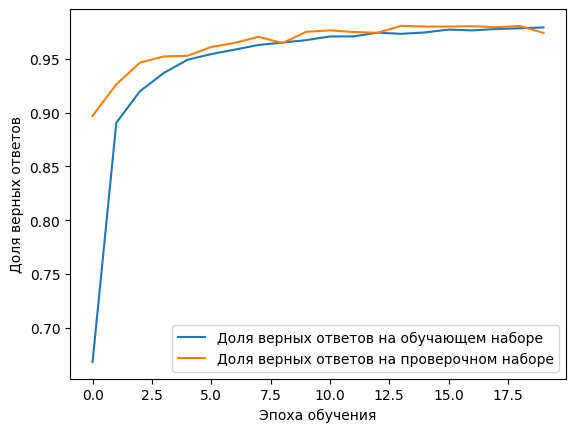

In [80]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:


alphabet = {0: "А", 1: "Б", 2: "В", 3: "Г", 4: "Д", 5: "Е", 6: "Ж", 7: "З",
            8: "И", 9: "К", 10: "Л", 11: "М", 12: "Н", 13: "О", 14: "П", 15: "Р",
            16: "С", 17: "Т", 18: "У", 19: "Ф", 20: "Х", 21: "Ц", 22: "Ч", 23: "Ш",
            24: "Ъ", 25: "Ы", 26: "Ь", 27: "Э", 28: "Ю", 29: "Я", 30: "spoke", 31: "Fuck you",}
#alphabet[0]

#Тестирование сети

In [ ]:
#Выбираем номер пример
n = np.random.randint(xTest.shape[0])
#Получаем выход сети на этом примере
prediction = model.predict(xTest)

#Выводим на экран результаты
print("Вход сети:",xTest[n])
print("Выход сети: ", prediction[n])
print("Распознанная буква: ", np.argmax(prediction[n]))
print("Уверенность: ", max(prediction[n]))
#print("Верный ответ: ", np.argmax(yTest[n]))
print("Верный ответ: ", yTest[n])
print("Буква ответа: ", alphabet[np.argmax(prediction[n])])

92/92 [==============================] - 0s 1ms/step
Вход сети: tf.Tensor(
[ 2.5973994e-01  8.9324623e-01  1.1528828e-07  3.5665974e-01
  7.9688764e-01  2.2596706e-02  4.1823992e-01  6.9790035e-01
  1.9687276e-02  4.6605426e-01  6.4053899e-01  6.4189350e-03
  5.0649643e-01  6.0523713e-01 -6.8526058e-03  3.2173285e-01
  4.7568220e-01  1.6309600e-02  4.1397539e-01  4.3379956e-01
 -8.6668450e-03  4.7078431e-01  4.7556013e-01 -3.0949520e-02
  5.0567663e-01  5.2223492e-01 -4.5587722e-02  3.0026716e-01
  4.8494902e-01 -1.4753007e-02  4.1404176e-01  4.3192881e-01
 -4.2532265e-02  4.7451130e-01  4.8612747e-01 -6.2371090e-02
  5.0687182e-01  5.4977232e-01 -7.2590657e-02  2.9144514e-01
  5.2899569e-01 -4.5826677e-02  3.9391020e-01  4.8035461e-01
 -7.2446138e-02  4.5888489e-01  5.2523857e-01 -8.0848157e-02
  4.9609613e-01  5.7446223e-01 -8.1688248e-02  2.9623568e-01
  6.0039777e-01 -7.5467579e-02  3.7127769e-01  5.3574538e-01
 -9.5378488e-02  4.2346746e-01  5.4334986e-01 -9.6289836e-02
  4.614659

In [ ]:
prediction = model.predict(xTest)
#prediction.shape
z=np.max(prediction)
print(z)

102/102 [==============================] - 0s 2ms/step
1.0


In [ ]:
model.evaluate(xTest, yTest)

In [ ]:
xTest2 = np.asarray(xTest)
yTest2 = np.asarray(yTest)

In [ ]:
model.evaluate(xTest2, yTest2) # не работае - пишем сами

# Проверка точности

In [ ]:
def evaluate():
  prediction = model.predict(xTest)
  detected = predictedClasses(prediction)
  errors = compare(detected, yTest)
  print("Процент ошибок модели:",len(errors)/xTest.shape[0]*100)

def predictedClasses(prediction = prediction):
  detected = []
  for x in  range(prediction.shape[0]):
    #print(x)
    detect=np.argmax(prediction[x])
    detected.append(int(detect))
  return detected



In [ ]:
prediction = model.predict(xTest)
detected = predictedClasses(prediction)

92/92 [==============================] - 0s 1ms/step


In [ ]:
def compare(detected= detected,yTest=yTest):
  errors =[]
  for y in  range(prediction.shape[0]):
   if detected[y] != yTest[y]:
     print("index:", y, "not equal" , detected[y], ":", yTest[y])
     errors.append(y)
  return errors

In [ ]:
for y in  range(prediction.shape[0]):
 if detected[y] != yTest[y]:
   print("index:", y, "not equal" , detected[y], ":", yTest[y])


index: 207 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 574 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)
index: 585 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1400 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1460 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)
index: 1569 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1874 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1882 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)
index: 2149 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)
index: 2267 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)
index: 2436 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)
index: 2491 not equal 30 : tf.Tensor(2.0, shape=(), dtype=float32)
index: 2511 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)


#Model:
index: 175 not equal 30 : tf.Tensor(2.0, shape=(), dtype=float32)

index: 765 not equal 30 : tf.Tensor(2.0, shape=(), dtype=float32)

index: 1178 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 2109 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 2499 not equal 30 : tf.Tensor(2.0, shape=(), dtype=float32)

index: 3124 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 3153 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)

#modelGPU:
index: 207 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 574 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 585 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1400 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1460 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)

index: 1569 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1874 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1882 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)

index: 2149 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)

index: 2267 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 2436 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 2491 not equal 30 : tf.Tensor(2.0, shape=(), dtype=float32)

index: 2511 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)


In [ ]:
len(detected)

2924

In [ ]:
errors = compare()

index: 207 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 574 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)
index: 585 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1400 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1460 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)
index: 1569 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1874 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)
index: 1882 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)
index: 2149 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)
index: 2267 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)
index: 2436 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)
index: 2491 not equal 30 : tf.Tensor(2.0, shape=(), dtype=float32)
index: 2511 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)


In [ ]:
len(errors)/prediction.shape[0] * 100

0.44459644322845415

In [ ]:
prediction[3249]

In [ ]:
prediction.shape[0]

3249

In [ ]:
# бывает на 39% уверен в классе на нулях...

coord = np.zeros((1, 63))
prediction = model.predict(coord)
prediction
print(prediction)
print(np.max(prediction))


1/1 [==============================] - 0s 24ms/step
[[1.7956421e-01 1.8098393e-02 3.1828135e-03 2.8470103e-02 8.2751326e-03
  1.6633717e-02 8.3592176e-02 1.3704590e-01 1.1359211e-01 2.2897962e-03
  6.2239633e-05 2.7871242e-04 7.7107269e-03 1.8510434e-03 8.7675788e-03
  7.8923495e-06 4.2170432e-06 6.4171940e-02 6.0334440e-02 4.8921242e-02
  1.2860060e-03 1.5694538e-02 3.6902409e-02 5.8715792e-05 9.8768651e-05
  1.5824558e-03 3.1486473e-03 9.9917939e-05 8.7503187e-02 6.5278433e-02
  6.6082610e-04 4.8317495e-03]]
0.17956421


In [ ]:
# Тестирование штучных букв
#П
#coord =[0.07382853329181671, 0.29705730080604553, 8.066153895924799e-07, 0.15619437396526337, 0.27812460064888, -0.017141325399279594, 0.23029449582099915, 0.30197474360466003, -0.04070072993636131, 0.2693402171134949, 0.32852354645729065, -0.06378539651632309, 0.26094740629196167, 0.36418387293815613, -0.08777189254760742, 0.19807741045951843, 0.2967849373817444, -0.06407968699932098, 0.22471311688423157, 0.4540770947933197, -0.09898152947425842, 0.23131665587425232, 0.5489397048950195, -0.12455523759126663, 0.23417448997497559, 0.6232572793960571, -0.14168839156627655, 0.13512897491455078, 0.3123084306716919, -0.07283361256122589, 0.17696614563465118, 0.48330211639404297, -0.10676659643650055, 0.20385117828845978, 0.583126962184906, -0.11869517713785172, 0.22478753328323364, 0.6605881452560425, -0.12869113683700562, 0.08507677912712097, 0.3414948880672455, -0.07993321865797043, 0.13653555512428284, 0.4935353398323059, -0.10179431736469269, 0.1563243865966797, 0.5140849351882935, -0.09046433866024017, 0.16277647018432617, 0.512308657169342, -0.08160097897052765, 0.05012309551239014, 0.3791632354259491, -0.08960475772619247, 0.10008449852466583, 0.5002524852752686, -0.09692823141813278, 0.1287933886051178, 0.5107050538063049, -0.08181720227003098, 0.1397624909877777, 0.49923381209373474, -0.07085470855236053]
#И
#coord = [0.1852160543203354, 0.7453945875167847, -3.8234364296840795e-07, 0.23912248015403748, 0.7321180105209351, -0.02075999416410923, 0.28291499614715576, 0.6261799335479736, -0.027360007166862488, 0.2936065196990967, 0.5290923714637756, -0.03356698527932167, 0.2668515145778656, 0.4662325382232666, -0.034751176834106445, 0.28938618302345276, 0.5517240166664124, 0.013535826466977596, 0.31419456005096436, 0.4751153588294983, -0.006203461904078722, 0.30148497223854065, 0.5147585272789001, -0.022451654076576233, 0.2846531569957733, 0.5457805395126343, -0.03144080936908722, 0.257175475358963, 0.5258849263191223, 0.010662326589226723, 0.27798494696617126, 0.4323633909225464, -0.019735237583518028, 0.27023813128471375, 0.4852648675441742, -0.035500962287187576, 0.2597499489784241, 0.5317018032073975, -0.03512187302112579, 0.22375717759132385, 0.5100060105323792, 0.0010018061148002744, 0.24133053421974182, 0.40350794792175293, -0.018839156255126, 0.25072458386421204, 0.35096728801727295, -0.031512048095464706, 0.25399672985076904, 0.2963838577270508, -0.035353049635887146, 0.18965387344360352, 0.5066860914230347, -0.010661747306585312, 0.1989540457725525, 0.4273562431335449, -0.016749178990721703, 0.20254945755004883, 0.3787115812301636, -0.01910240575671196, 0.20274946093559265, 0.32427978515625, -0.0210084430873394]

#П!!!
coord = [0.07382853329181671, 0.29705730080604553, 8.066153895924799e-07, 0.15619437396526337, 0.27812460064888, -0.017141325399279594, 0.23029449582099915, 0.30197474360466003, -0.04070072993636131, 0.2693402171134949, 0.32852354645729065, -0.06378539651632309, 0.26094740629196167, 0.36418387293815613, -0.08777189254760742, 0.19807741045951843, 0.2967849373817444, -0.06407968699932098, 0.22471311688423157, 0.4540770947933197, -0.09898152947425842, 0.23131665587425232, 0.5489397048950195, -0.12455523759126663, 0.23417448997497559, 0.6232572793960571, -0.14168839156627655, 0.13512897491455078, 0.3123084306716919, -0.07283361256122589, 0.17696614563465118, 0.48330211639404297, -0.10676659643650055, 0.20385117828845978, 0.583126962184906, -0.11869517713785172, 0.22478753328323364, 0.6605881452560425, -0.12869113683700562, 0.08507677912712097, 0.3414948880672455, -0.07993321865797043, 0.13653555512428284, 0.4935353398323059, -0.10179431736469269, 0.1563243865966797, 0.5140849351882935, -0.09046433866024017, 0.16277647018432617, 0.512308657169342, -0.08160097897052765, 0.05012309551239014, 0.3791632354259491, -0.08960475772619247, 0.10008449852466583, 0.5002524852752686, -0.09692823141813278, 0.1287933886051178, 0.5107050538063049, -0.08181720227003098, 0.1397624909877777, 0.49923381209373474, -0.07085470855236053]
#П
#coord = [0.30301278829574585, 0.288257896900177, 0.0000004854451276514737, 0.34171971678733826, 0.34285590052604675, -0.02668769098818302, 0.3532060384750366, 0.4360407292842865, -0.050868913531303406, 0.339555561542511, 0.5277861952781677, -0.06598958373069763, 0.3198733925819397, 0.5910946726799011, -0.08103153109550476, 0.34084123373031616, 0.3989459276199341, -0.10134444385766983, 0.3288315534591675, 0.5505191683769226, -0.13210231065750122, 0.3171883821487427, 0.6398290395736694, -0.1405279040336609, 0.306348979473114, 0.7022145986557007, -0.14214593172073364, 0.3005397319793701, 0.387072890996933, -0.09736934304237366, 0.28743255138397217, 0.5540483593940735, -0.12759795784950256, 0.27975526452064514, 0.6515253782272339, -0.13213515281677246, 0.2725639343261719, 0.7206608653068542, -0.13328270614147186, 0.2652584910392761, 0.38501185178756714, -0.09006208181381226, 0.25003358721733093, 0.5372126698493958, -0.11463843286037445, 0.2491769641637802, 0.6235367655754089, -0.11702749878168106, 0.2528173327445984, 0.6809425950050354, -0.11600979417562485, 0.2388165295124054, 0.3886778652667999, -0.08259791135787964, 0.22239744663238525, 0.5032351016998291, -0.10122298449277878, 0.2274070531129837, 0.5592160224914551, -0.10219717025756836, 0.23893268406391144, 0.5928277373313904, -0.10027573257684708]

# В
#coord = [0.35729506611824036, 0.8780389428138733, 4.9007934421752e-07, 0.4260173439979553, 0.8213366270065308, -0.028420785441994667, 0.4576464891433716, 0.7004029750823975, -0.039855875074863434, 0.4686683118343353, 0.599469780921936, -0.048703882843256, 0.4699113965034485, 0.5176169872283936, -0.058756668120622635, 0.4009574055671692, 0.5388856530189514, -0.035041313618421555, 0.3935677111148834, 0.3948918879032135, -0.06017583608627319, 0.384386271238327, 0.3025549650192261, -0.07986263930797577, 0.37422123551368713, 0.22244957089424133, -0.09444612264633179, 0.35666075348854065, 0.538060188293457, -0.038433562964200974, 0.3467254340648651, 0.37639886140823364, -0.06539927423000336, 0.33850109577178955, 0.26489806175231934, -0.08885236084461212, 0.3316236138343811, 0.17310628294944763, -0.10490606725215912, 0.31664592027664185, 0.5687299966812134, -0.044474564492702484, 0.30176642537117004, 0.40825510025024414, -0.073113813996315, 0.2902766466140747, 0.3020734190940857, -0.09587576985359192, 0.2820080518722534, 0.2127179205417633, -0.10955905169248581, 0.2802068293094635, 0.6242828965187073, -0.052093248814344406, 0.2641552686691284, 0.499703586101532, -0.08249180018901825, 0.2542094886302948, 0.41435888409614563, -0.10079597681760788, 0.24697604775428772, 0.3354477882385254, -0.11104355752468109]
# И
#coord = [0.1844799816608429, 0.7426356077194214, -3.8552235537281376e-07, 0.2386315017938614, 0.7299306392669678, -0.019598137587308884, 0.28337350487709045, 0.6262499690055847, -0.025707704946398735, 0.29537642002105713, 0.5302426218986511, -0.031591616570949554, 0.2687552273273468, 0.4686897397041321, -0.03280458226799965, 0.2909908890724182, 0.5516494512557983, 0.013557979837059975, 0.3148629069328308, 0.4766775965690613, -0.005436482839286327, 0.3030337691307068, 0.5147871375083923, -0.02162541076540947, 0.28706490993499756, 0.5454805493354797, -0.030789373442530632, 0.2589741349220276, 0.5256085395812988, 0.0102010453119874, 0.27836713194847107, 0.43405699729919434, -0.019366204738616943, 0.2717840075492859, 0.4851033091545105, -0.03514128550887108, 0.26226213574409485, 0.531171441078186, -0.0351191982626915, 0.2252557873725891, 0.5094099044799805, 0.0003189891285728663, 0.2420070916414261, 0.4052600860595703, -0.019107438623905182, 0.25226402282714844, 0.352230966091156, -0.03199918195605278, 0.256457656621933, 0.2980387806892395, -0.03617389500141144, 0.19047479331493378, 0.5057279467582703, -0.011447431519627571, 0.1996576488018036, 0.4268968105316162, -0.01757560297846794, 0.20334982872009277, 0.37837594747543335, -0.019919509068131447, 0.20369502902030945, 0.32476189732551575, -0.021875817328691483]
coord = np.asarray(coord)

print(coord.shape)

coord = np.asarray(coord).astype(np.float32).reshape(1,63)
print(coord)

prediction = model.predict(coord)
print(np.argmax(prediction))
print("Буква ответа: ", alphabet[np.argmax(prediction)])


(63,)
[[ 7.3828533e-02  2.9705730e-01  8.0661539e-07  1.5619437e-01
   2.7812460e-01 -1.7141325e-02  2.3029450e-01  3.0197474e-01
  -4.0700730e-02  2.6934022e-01  3.2852355e-01 -6.3785397e-02
   2.6094741e-01  3.6418387e-01 -8.7771893e-02  1.9807741e-01
   2.9678494e-01 -6.4079687e-02  2.2471312e-01  4.5407709e-01
  -9.8981529e-02  2.3131666e-01  5.4893970e-01 -1.2455524e-01
   2.3417449e-01  6.2325728e-01 -1.4168839e-01  1.3512897e-01
   3.1230843e-01 -7.2833613e-02  1.7696615e-01  4.8330212e-01
  -1.0676660e-01  2.0385118e-01  5.8312696e-01 -1.1869518e-01
   2.2478753e-01  6.6058815e-01 -1.2869114e-01  8.5076779e-02
   3.4149489e-01 -7.9933219e-02  1.3653556e-01  4.9353534e-01
  -1.0179432e-01  1.5632439e-01  5.1408494e-01 -9.0464339e-02
   1.6277647e-01  5.1230866e-01 -8.1600979e-02  5.0123096e-02
   3.7916324e-01 -8.9604758e-02  1.0008450e-01  5.0025249e-01
  -9.6928231e-02  1.2879339e-01  5.1070505e-01 -8.1817202e-02
   1.3976249e-01  4.9923381e-01 -7.0854709e-02]]
1/1 [==========

In [ ]:
#A
coord = [358, 292, 0, 389, 268, -8, 407, 232, -10, 409, 209, -12, 400, 204, -11, 394, 197, 3, 397, 183, -7, 395, 208, -13, 392, 213, -16, 373, 195, 2, 377, 185, -7, 377, 214, -9, 374, 218, -8, 353, 198, 0, 356, 187, -10, 359, 214, -6, 357, 220, -1, 333, 203, -4, 339, 191, -7, 343, 210, -2, 342, 217, 3]
coord = np.asarray(coord)
print(coord.shape)
coord = np.expand_dims(coord, axis = 0).shape
print(coord)

(63,)
(1, 63)


In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture("/content/fingers/helloWorld.mp4", cv2.CAP_DSHOW)


# устанавливаем счетчик
counter=0

# запускаем бесконечный цикл и проверяем статус камеры
while cap.isOpened():

    # читаем кадры с записи или камеры в frame
    _, frame = cap.read()

    # переводим кадр в черно-белую градацию
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


    # выделяем на кадре эти области прямоугольником
    for x, y, width, height in faces:
        cv2.rectangle(frame, (x, y), (x + width, y + height), color=(255, 0, 0), thickness=2)


     # вырезаем и сохраняем  найденные объекты
     # в папку detected_from_video_screen. Точка перед ней указывает на текущий каталог
    for x, y, width, height in faces:
        crop_img = frame[y:y + height, x:x + width]
        cv2.imwrite("./frame_{0}.jpg".format(counter), crop_img)
        counter = counter+1

    cv2.imshow("frame", frame)
    if cv2.waitKey(40) == 27:
      break


cap.release()
cv2.destroyAllWindows()

## НАЧАЛО  ФРОНТА

In [ ]:
!pip install mediapipe opencv-python
import mediapipe as mp
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 19.3 MB/s eta 0:00:00


In [ ]:
#model.load('/content/drive/My Drive/Data/fingers-2float-model.h5')
#model.load_weights('/content/drive/My Drive/Data/fingers-2float-w.h5') # Сохраняем модель
#modelED.load_weights('/content/drive/My Drive/Data/LawNowBotAI1C.h5') # Загружаем модель

In [ ]:

import numpy as np
import uuid
import os
from google.colab.patches import cv2_imshow

In [ ]:
mp_drawing = mp.solutions.drawing_utils

mp_hands = mp.solutions.hands

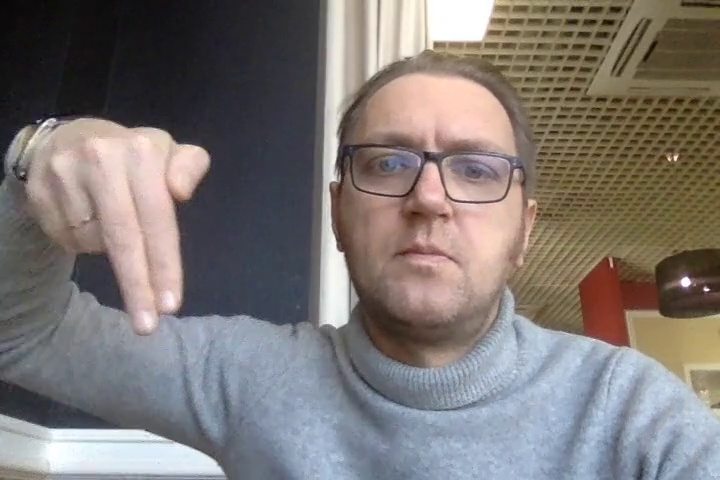

In [ ]:
# Просмотр кадра
img = cv2.imread('/content/frames/frame20.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
alphabet = {0: "А", 1: "Б", 2: "В", 3: "Г", 4: "Д", 5: "Е", 6: "Ж", 7: "З",
                               8: "И", 9: "К", 10: "Л", 11: "М", 12: "Н", 13: "О", 14: "П", 15: "Р",
                               16: "С", 17: "Т", 18: "У", 19: "Ф", 20: "Х", 21: "Ц", 22: "Ч", 23: "Ш",

                               24: "Ъ", 25: "Ы", 26: "Ь", 27: "Э", 28: "Ю", 29: "Я", 30: "spoke", 31: "Fuck you", }

framesDir = '/content/frames/'
outDir = '/content/out/'

In [ ]:
# Получение координат кисти с кадра
from PIL import ImageFont, ImageDraw, Image
def getCoordinats(img ="frame20.jpg"):

 cap = cv2.imread(framesDir+img, cv2.IMREAD_UNCHANGED)
 h, w, ret = cap.shape
 #print(h,w)

 with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: #You can pass `max_num_hands` argument here as well if you want to detect more that one hand

      image = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB)

      image.flags.writeable = False

      results = hands.process(image)

      ## Если рука в кадре
      if results.multi_hand_landmarks:
        #print(results)

        image.flags.writeable = True

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        #print(results)
        finger = []
        for hand_landmarks in results.multi_hand_landmarks:

           fx =hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * w
           fy = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * h
           finger.append(fx)
           finger.append(fy)
        coordList = []
        for hand_landmarks in results.multi_hand_landmarks:
           for ids, landmrk in enumerate(hand_landmarks.landmark):
                               #print(ids,":",landmrk)

                               cx, cy, cz = landmrk.x, landmrk.y, landmrk.z
                               coordList.append(cx)
                               coordList.append(cy)
                               coordList.append(cz)

        # Rendering results
        if results.multi_hand_landmarks:

            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, )

        cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        #cv2_imshow(image)
      #если руки нет

      else:
        coordList = np.zeros((1, 63))
        coordList = np.asarray(coordList).astype(np.float32).reshape(1,63)
        #finger = np.zeros((1, 2))

 cv2.destroyAllWindows()

 #print(int(finger[0]),int(finger[1]))



 #pred = recognizer(coord)
 #print("Буква ответа: ", alphabet[pred])

 return coordList

#coord, fingerX, fingerY= getCoordinats()

coord = getCoordinats()
print(coord)
#
#print(coord)

[0.07382853329181671, 0.29705730080604553, 8.066153895924799e-07, 0.15619437396526337, 0.27812460064888, -0.017141325399279594, 0.23029449582099915, 0.30197474360466003, -0.04070072993636131, 0.2693402171134949, 0.32852354645729065, -0.06378539651632309, 0.26094740629196167, 0.36418387293815613, -0.08777189254760742, 0.19807741045951843, 0.2967849373817444, -0.06407968699932098, 0.22471311688423157, 0.4540770947933197, -0.09898152947425842, 0.23131665587425232, 0.5489397048950195, -0.12455523759126663, 0.23417448997497559, 0.6232572793960571, -0.14168839156627655, 0.13512897491455078, 0.3123084306716919, -0.07283361256122589, 0.17696614563465118, 0.48330211639404297, -0.10676659643650055, 0.20385117828845978, 0.583126962184906, -0.11869517713785172, 0.22478753328323364, 0.6605881452560425, -0.12869113683700562, 0.08507677912712097, 0.3414948880672455, -0.07993321865797043, 0.13653555512428284, 0.4935353398323059, -0.10179431736469269, 0.1563243865966797, 0.5140849351882935, -0.09046433

In [ ]:
# Распознование координат
# возврат: распознанное буквы и процента уверенности
def recognizer(coord):
 coord = np.asarray(coord)

 coord = np.asarray(coord).astype(np.float32).reshape(1,63)
 coord = tf.convert_to_tensor(coord, dtype=tf.float32)

 prediction = model.predict(coord)
 print(np.max(prediction))
 #print("Буква ответа: ", alphabet[np.argmax(prediction)])
 return np.argmax(prediction), np.max(prediction)

pred = recognizer(coord)


1/1 [==============================] - 0s 17ms/step
0.90048254


In [ ]:
pred, sure = recognizer(coord)
print("Буква ответа: ", alphabet[pred])


1/1 [==============================] - 0s 19ms/step
0.90048254
Буква ответа:  П


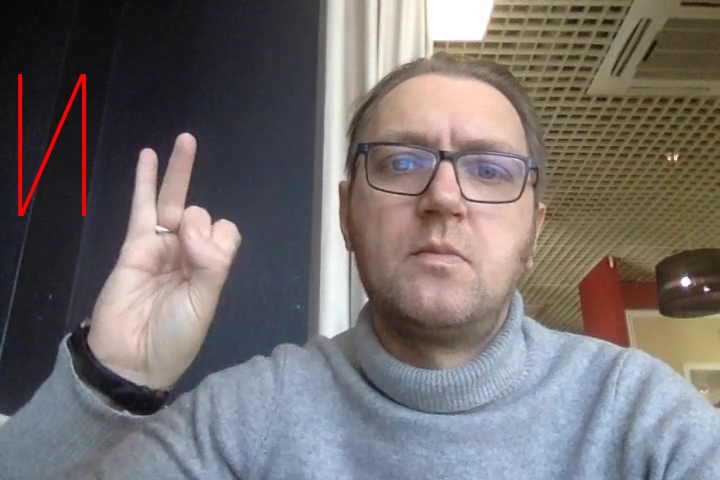

In [ ]:
#тестируем русский язык

from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/frames/frame94.jpg")

font = ImageFont.truetype("/content/AlumniSansPinstripe-Regular.ttf", 240)
drawer = ImageDraw.Draw(image)
drawer.text((0, 0), "И", font=font, fill='red')

image.save("/content/"+"new_img.jpg")
image.show()

In [ ]:
def getFrames(listingPath=framesDir):
  ListY = []
  val=os.listdir(listingPath)

  for x in range(len(val)):
    val[x].partition('-')[0]
    if val[x].endswith(".jpg"):
      ListY.append(val[x].partition('-')[0])
  return ListY

#print(getFrames())
#len(getFrames())

alphabet = {0: "А", 1: "Б", 2: "В", 3: "Г", 4: "Д", 5: "Е", 6: "Ж", 7: "З",

 8: "И", 9: "К", 10: "Л", 11: "М", 12: "Н", 13: "О", 14: "П", 15: "Р",

16: "С", 17: "Т", 18: "У", 19: "Ф", 20: "Х", 21: "Ц", 22: "Ч", 23: "Ш",

24: "Ъ", 25: "Ы", 26: "Ь", 27: "Э", 28: "Ю", 29: "Я", 30: "spoke", 31: "Fuck you", }

In [ ]:
#Запуск обработки всех кадров с сохранение в папку out

def Starter():
  frames = getFrames(framesDir)
  for frame in frames:
    print(frame)

    coord=getCoordinats(frame)
    print(coord)
    #prediction
    coord = np.asarray(coord)

    coord = np.asarray(coord).astype(np.float32).reshape(1,63)

    coord = np.asarray(coord).astype(np.float32).reshape(1,63)
    pred, sure = recognizer(coord)


# рисование
    image =Image.open(framesDir+frame)
    #sure=1
    if sure > 0.75:

      font = ImageFont.truetype("/content/AlumniSansPinstripe-Regular.ttf", 200)
      drawer = ImageDraw.Draw(image)
      drawer.text((0, 0), alphabet[pred], font=font, fill='red')
      #print("буква: ",alphabet[pred])

    print("Буква ответа: ", alphabet[pred],"уверенность: ",sure)

    font = ImageFont.truetype("/content/AlumniSansPinstripe-Regular.ttf", 50)
    drawer = ImageDraw.Draw(image)
    drawer.text((200, 0), str(sure), font=font, fill='red')
    image.save(outDir+frame)
    #image.show()
    #print(coord)
Starter()





frame185.jpg
[0.13648131489753723, 0.4651585817337036, 7.626392743986798e-07, 0.21668629348278046, 0.475616991519928, -0.017820142209529877, 0.270099401473999, 0.5645784139633179, -0.04351864382624626, 0.27665984630584717, 0.6697680354118347, -0.06296608597040176, 0.27292272448539734, 0.741063117980957, -0.08404404670000076, 0.27474701404571533, 0.5360672473907471, -0.10269736498594284, 0.30253612995147705, 0.6912887692451477, -0.13357192277908325, 0.31173187494277954, 0.7820875644683838, -0.1438395380973816, 0.3172261714935303, 0.855751097202301, -0.14847725629806519, 0.21870404481887817, 0.5566118359565735, -0.10834827274084091, 0.2564772665500641, 0.7124767303466797, -0.14354325830936432, 0.2747960388660431, 0.8180928230285645, -0.15381355583667755, 0.2856084704399109, 0.8998057842254639, -0.16048674285411835, 0.16887080669403076, 0.5844018459320068, -0.10940774530172348, 0.20069468021392822, 0.7350133061408997, -0.1383102536201477, 0.22265711426734924, 0.8414120674133301, -0.148521

[0.07382853329181671, 0.29705730080604553, 8.066153895924799e-07, 0.15619437396526337, 0.27812460064888, -0.017141325399279594, 0.23029449582099915, 0.30197474360466003, -0.04070072993636131, 0.2693402171134949, 0.32852354645729065, -0.06378539651632309, 0.26094740629196167, 0.36418387293815613, -0.08777189254760742, 0.19807741045951843, 0.2967849373817444, -0.06407968699932098, 0.22471311688423157, 0.4540770947933197, -0.09898152947425842, 0.23131665587425232, 0.5489397048950195, -0.12455523759126663, 0.23417448997497559, 0.6232572793960571, -0.14168839156627655, 0.13512897491455078, 0.3123084306716919, -0.07283361256122589, 0.17696614563465118, 0.48330211639404297, -0.10676659643650055, 0.20385117828845978, 0.583126962184906, -0.11869517713785172, 0.22478753328323364, 0.6605881452560425, -0.12869113683700562, 0.08507677912712097, 0.3414948880672455, -0.07993321865797043, 0.13653555512428284, 0.4935353398323059, -0.10179431736469269, 0.1563243865966797, 0.5140849351882935, -0.09046433

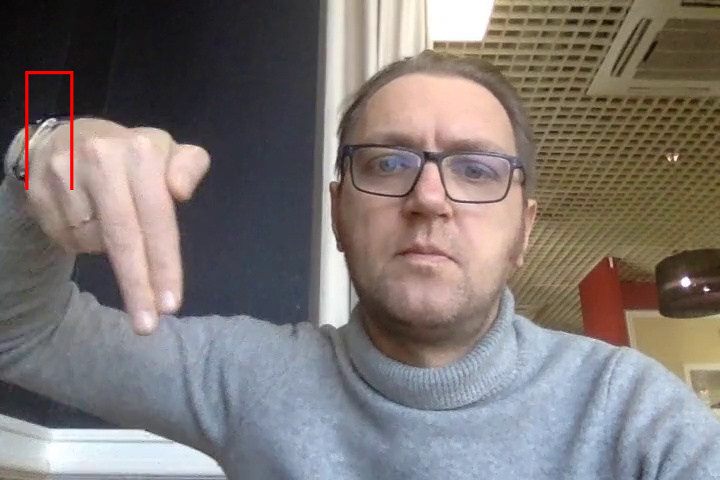

In [ ]:
# штучный тест кадров
# на одних входящих нулях 97% уверенность в букве Ж
# вывод - нет руки - нет буквы
frame = "frame20.jpg"
coord=getCoordinats(frame)
print(coord)
    #prediction
coord = np.asarray(coord)

coord = np.asarray(coord).astype(np.float32).reshape(1,63)
prediction = model.predict(coord)
pred, sure = recognizer(coord)
print("Уверенность:", sure)

framesDir ="/content/frames/"
outDir ="/content/out/"

image =Image.open(framesDir+frame)


font = ImageFont.truetype("/content/AlumniSansPinstripe-Regular.ttf", 200)
drawer = ImageDraw.Draw(image)
drawer.text((10, 10), alphabet[pred], font=font, fill='red')
    #
image.save(outDir+frame)
image.show()

# Собираем Франкенштейна

In [ ]:
!pip install imageio
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import imageio
import numpy as np
frames = []
img = os.listdir("/content/out/")
img = sorted(img, key = lambda x: int( x[5:-4]))

for i in img:
  frames.append(imageio.imread("/content/out/"+i))
frames = np.array(frames)
imageio.mimsave("final.mp4", frames, fps=30)

print('Сборка завершена')


<ipython-input-45-3316233ef988>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread("/content/out/"+i))


Сборка завершена


In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('final.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Выводы:
На модели созданной человеоком ошибака равна 0,215%, преимущественно путаются калассы 2 - "В" и 30 - "spoke", что видно даже из видео. Визуально они мало чем различаютя. Возможно сыграло роль золотое кольцо на руке при записи датасета, 21-й - "Ц" класс и 29-й - "Я" тоже очень похожи. Возможно вылечить увеличив датасет или тренировкой на этих классах.

На модели предложенной chatGPU
13 ошибок, если 21-29 и  30-2 являлись ожидаемыми, то 10-14 (Л-П) и 20-4 (Д-Х) - это уже совсем деградация. Процент ошибки 0.44459644322845415. Tada - человек победил!


index: 207 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 574 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 585 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1400 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1460 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)

index: 1569 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1874 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

index: 1882 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)

index: 2149 not equal 20 : tf.Tensor(4.0, shape=(), dtype=float32)

index: 2267 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 2436 not equal 21 : tf.Tensor(29.0, shape=(), dtype=float32)

index: 2491 not equal 30 : tf.Tensor(2.0, shape=(), dtype=float32)

index: 2511 not equal 10 : tf.Tensor(14.0, shape=(), dtype=float32)

# Лишнее

In [ ]:
# 2
from PIL import ImageFont, ImageDraw, Image
def getCoordinats(img ="frame94.jpg"):

 cap = cv2.imread(framesDir+img, cv2.IMREAD_UNCHANGED)

 h, w, ret = cap.shape


 with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: #You can pass `max_num_hands` argument here as well if you want to detect more that one hand

        image = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB)

        image.flags.writeable = False # что за флаг?

        results = hands.process(image)

        # image.flags.writeable = True

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        coordList = []
        #Если нет руки в кадре
        if not results.multi_hand_landmarks:

              coordList = np.asarray(coord).astype(np.float32).reshape(1,63)
        else:
         for hand_landmarks in results.multi_hand_landmarks:
        #   print('hand_landmarks:', hand_landmarks)
        #   print('Index finger tip coordinates: (',
           hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x,
           hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y

         for hand_landmarks in results.multi_hand_landmarks:
           for ids, landmrk in enumerate(hand_landmarks.landmark):
                               #print(ids,":",landmrk)

                               cx, cy, cz = landmrk.x, landmrk.y, landmrk.z
                               coordList.append(cx)
                               coordList.append(cy)
                               coordList.append(cz)


        # Rendering results
         if results.multi_hand_landmarks:

            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, )

            #recognizer(coordList)
            #text = "А"

#        cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
#        cv2_imshow(image)

# cv2.destroyAllWindows()
 return coordList

coord = getCoordinats()

In [ ]:
coord = getCoordinats("frame94.jpg")
print(coord)

[0.18432851135730743, 0.7517920732498169, -3.4422356520735775e-07, 0.23822513222694397, 0.7378060817718506, -0.02045268379151821, 0.28333553671836853, 0.6374186873435974, -0.027345281094312668, 0.29521670937538147, 0.5402047634124756, -0.03393607214093208, 0.2699822783470154, 0.47485917806625366, -0.03544575721025467, 0.2904791533946991, 0.561754584312439, 0.013771643862128258, 0.3165058493614197, 0.4831456243991852, -0.005099934991449118, 0.30346331000328064, 0.5224840044975281, -0.020837705582380295, 0.28604745864868164, 0.5540613532066345, -0.029411209747195244, 0.25880569219589233, 0.5341997742652893, 0.01091214083135128, 0.27883821725845337, 0.4390661418437958, -0.018092665821313858, 0.27204516530036926, 0.48780572414398193, -0.034107327461242676, 0.2616364359855652, 0.5304350852966309, -0.03411749750375748, 0.22621619701385498, 0.5175594091415405, 0.0015348781598731875, 0.24193204939365387, 0.4117594063282013, -0.01740383543074131, 0.25099772214889526, 0.3570181131362915, -0.0302

In [ ]:
def writer(frame, letter):
  framesDir ="/content/frames/"
  outDir ="/content/out/"

  image =Image.open(framesDir+frame)


  font = ImageFont.truetype("/content/AlumniSansPinstripe-Regular.ttf", 120)
  drawer = ImageDraw.Draw(image)
  drawer.text((50, 100), letter, font=font, fill='red') # разобраться с координатами

  image.save(outDir+frame)
  image.show()

In [ ]:
def recognizer(coord):
 coord = np.asarray(coord)
#coord.astype(np.int8)
#print(coord.shape)
#coord = coord.astype(int)

#coord=tf.convert_to_tensor(coord, dtype=tf.float32)
 coord = np.asarray(coord).astype(np.float32).reshape(1,63)
#yTrain=tf.convert_to_tensor(yTrain, dtype=tf.float32)

#coord = np.expand_dims(coord, axis = 0).shape
#coord = np.asarray(coord)
# print(coord)

#coord = np.asarray(coord)

#coord
 prediction = model.predict(coord)
 sure =float(np.max(prediction))
 #print(sure)
 #print(np.argmax(prediction))
 #print("Буква ответа: ", alphabet[np.argmax(prediction)])
 return np.argmax(prediction), sure

In [ ]:
pred, sur = recognizer(coord)
print(sur)

1/1 [==============================] - 0s 26ms/step
0.9932754039764404


## Сборка из кадров

In [ ]:
import cv2
import os

image_folder = 'frames'
video_name = 'final.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()